## 1. Import Relevant Python Libraries

In [247]:
# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries - Machine learning algorithm. 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Counting & missing data
from collections import Counter 
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

#### Data Load/Extraction

In [248]:
data = pd.read_csv("Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [249]:
# Drop irrelevant column - The CustomerID column doesn't have any effect on the analysis, hence, it will be dropped. 
data = data.drop(["customerID"], axis =1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Pre-processing - Cleaning and Preparation


In [250]:
# Data verfication - Data type, number of features and rows, missing data, etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [251]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [252]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [253]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [254]:
data.isnull()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

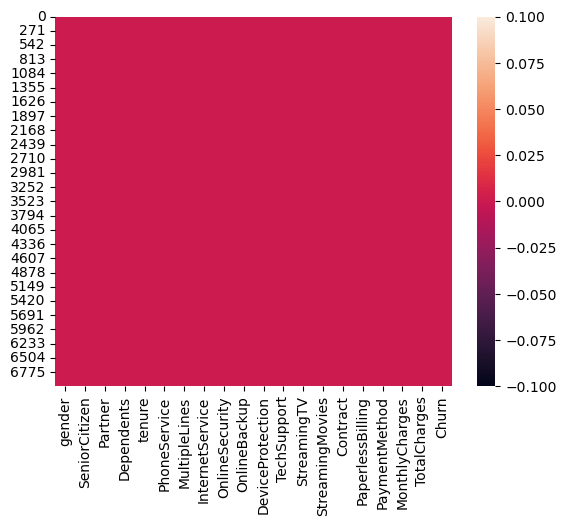

In [255]:
### Missing Values
sns.heatmap(data.isnull())

### GUIDE
1. **Problem definition clearly articulate the problem that is to be solved with your data mining How will the company benefit from
your solution?**
2. **Perform exploratory data analysis in Python**
   
    a) Visualize relationships between the label and some key features

    b) Explore correlations

    c) Conduct univariate, bivariate, and multivariate analysis as much as is feasible

4. **Perform feature engineering**
   
    a) Encoding categorical variables
   
    b) Create new features from existing features where necessary, depending on insights from your EDA
   
6. **Model selection, training, and validation**

    a) Train and test at least 3 supervised learning model
   
8. **Model evaluation**
 
    a) Analyze the results of your trained model
   
    b) What metrics are most important for the problem? Should the business be more concerned with better results on false
negatives or true positives?


### Check for duplicate data and remove

In [256]:
data.duplicated().sum()

22

In [257]:
data = data.drop_duplicates()

In [258]:
data.duplicated().sum()

0

In [259]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [260]:
data.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [261]:
pd.to_numeric(data['TotalCharges'], errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7021, dtype: float64

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [263]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Type Conversion

In [264]:
# Replace non-numeric values with NaN in the dataframe

data['TotalCharges'] = data['TotalCharges'].replace('', np.nan)
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

# Convert the 'TotalCharges' feature to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [265]:
# Replace the missing values in the TotalCharges column with the mean of the existing values

data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [266]:
data['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Index: 7021 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7021 non-null   float64
dtypes: float64(1)
memory usage: 109.7 KB


### Cleaned Data for EDA.
- Numerical Statistical Analysis.

- Categorical Statistical Analysis.
    
- Summary Statistics



In [267]:
# Numerical Statistical Analysis
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2265.044136
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


In [268]:
# Categorical Statistical Analysis
data.describe(include=["object", "bool"])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3541,3619,4911,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,5164


In [269]:
# Tenure group - Loyalty
def tenure_group(x):
    if x <= 20:
        return "Loyal"
    elif x <= 40:
        return "Very Loyal"
    elif x <= 60:
        return "Most Loyal"
    else:
        return "Longevity"

# Apply function to the data
data["tenure_group"] = data["tenure"].apply(tenure_group)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Loyal
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Very Loyal
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Loyal
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Most Loyal
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Very Loyal
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Longevity
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Loyal
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Loyal


## Exploratory Data Analysis (EDA)

- Conduct Univariate, Bivariate, and Multivariate Analysis as Much as is Feasible.
- 
Visualize Relationships Between the Label and Some Key Features.
- 
Explore Correlations.


In [270]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [271]:
# Show the categorical Features
cat_feat = data.select_dtypes('object').columns.to_list()
cat_feat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_group']

In [272]:
# Show the numerical features
num_feat = data.select_dtypes(np.number).columns.to_list()
num_feat

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

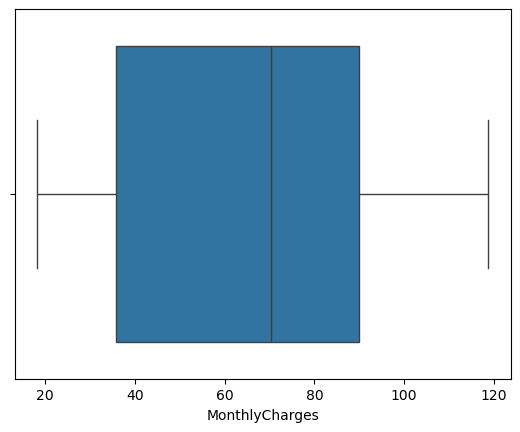

In [273]:
# Checking for Outliers in the MonthlyCharges feature.
sns.boxplot(x=data['MonthlyCharges']);

From the boxplot above, the median monthlycharge is =N=70 while the lower(25%) and upper(75%) quartile monthlycharge of the dataframe are =N=35 and =N=90. Additionally, the minimum and maximum monthlycharges are =N=18 and =N=119.

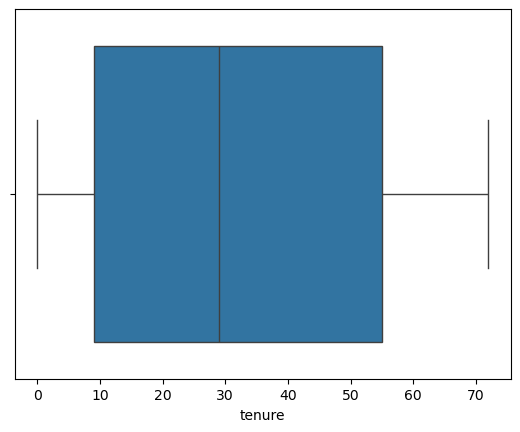

In [274]:
sns.boxplot(x=data['tenure']);

From the boxplot above, the median Totalcharge is =N=1,400 while the lower(25%) and upper(75%) quartile Totalcharge of the dataframe are =N=400 and =N=3,800. Additionally, the minimum and maximum Totalcharges are =N=18 and =N=8,600.

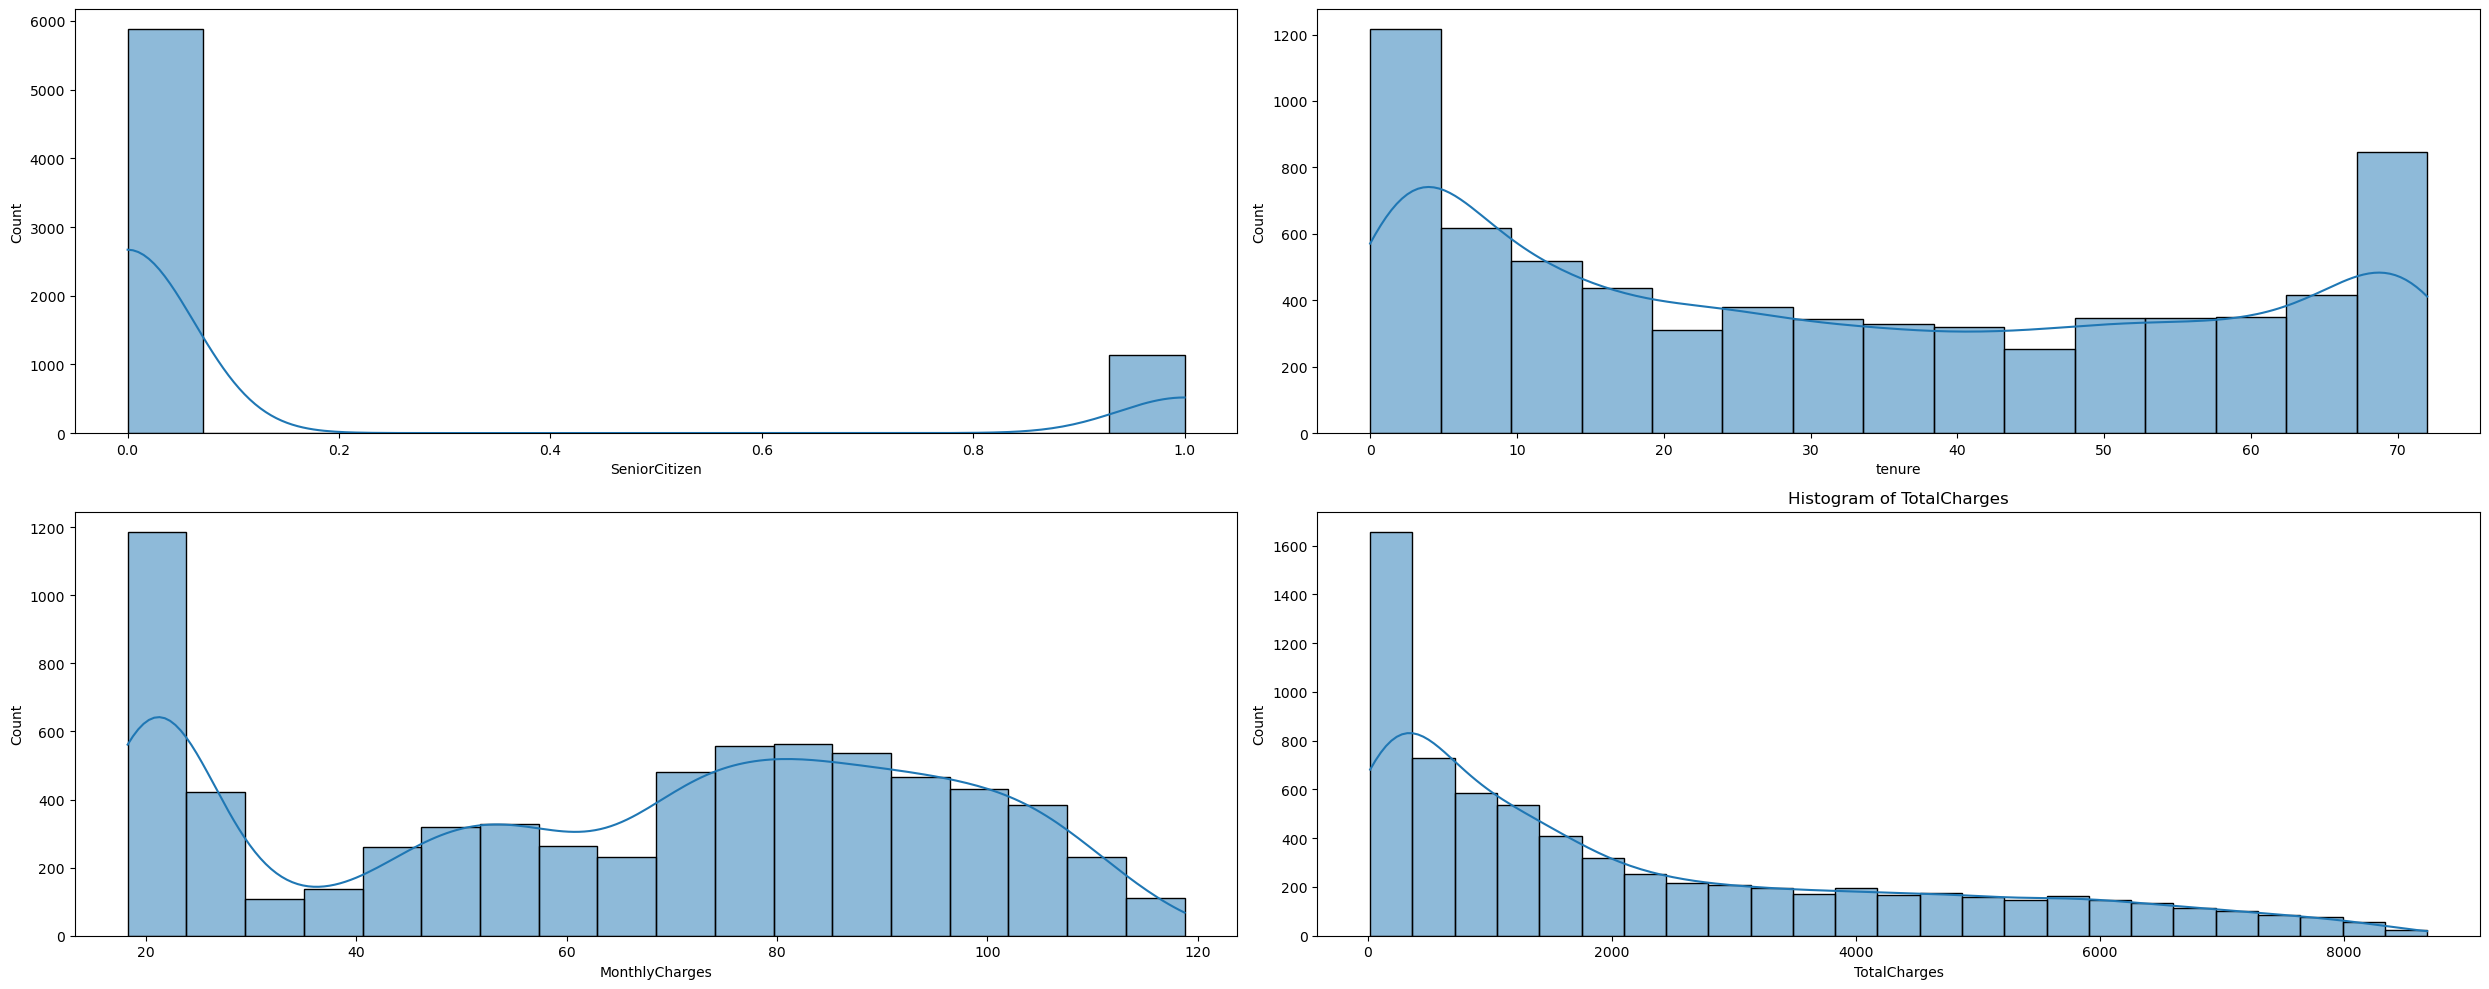

In [275]:
# Plotting histograms for numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
position = axes.flatten()

for index, feature in enumerate(num_feat):
    sns.histplot(data[feature], kde=True, ax=position[index])
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

### Narrations
The Histograms show the frequency distribution of numerical features, helping to understand their distribution and identify any skewness for the univariate analysis of the numerical features.

**SeniorCitizen** Shows a clear Right-skewed distribution, we have very low senior citizens compared to the large numbers that are not. 

**Tenure:** Shows a uniform distribution with peaks at certain lengths, indicating varied customer retention across different durations.


**MonthlyCharges:** Show a Right-skewed distribution, with most customers charged lower rates and fewer paying higher rates.

**TotalCharges:** Show a Right-skewed distribution, with most customers accumulating lower charges, suggesting a larger proportion of newer or lower-usage customers.

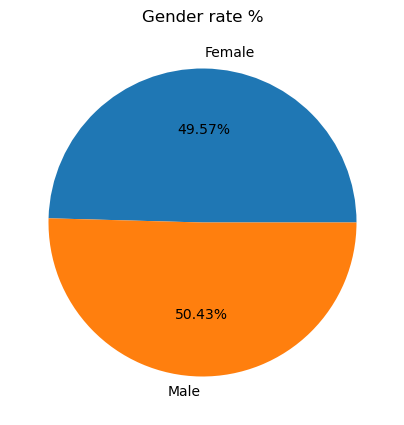

In [276]:
# Visualisation of Gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Gender rate %")
plt.show();

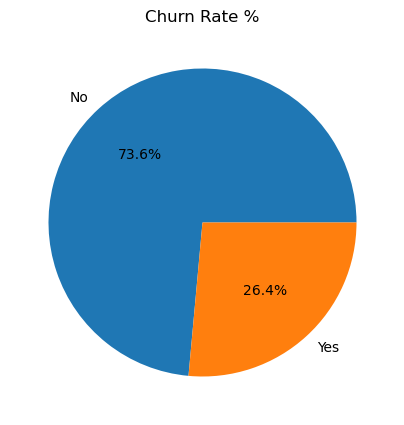

In [277]:
# Visualizing Churn feature in terms of Percentage distribution. 
from collections import Counter

fig,ax=plt.subplots(figsize=(5,5))
count=Counter(data["Churn"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.1f}%')
ax.set_title("Churn Rate %");

The pie chart above shows the Churn rate is presently at 26.54%, representing phoneline customers whose subscription are inactive or who have cancelled their service while 73.46% represent phoneline customers whose subscription are active or who have not cancelled their service.

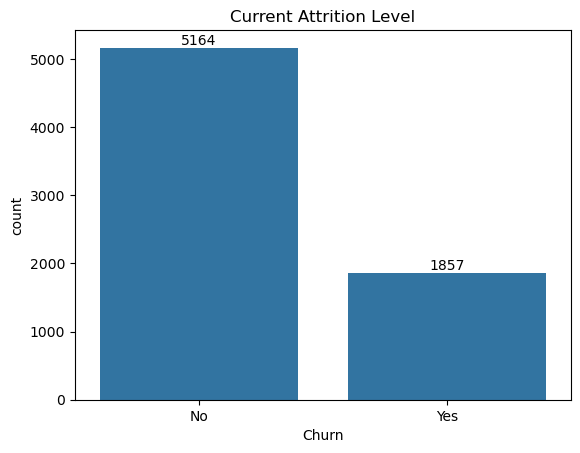

In [278]:
# Visualizing Churn feature in terms of bar distribution. 

ax=sns.countplot(x=data["Churn"], order=data["Churn"].value_counts(ascending=False).index)
values=data["Churn"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Current Attrition Level");

The bar chart above shows the current attrition level at Connecttel. Out of a total of 7,043 subscribers, about 1,869 subscribers representing 27% are already churned (that is, subscribers whose lines are inactive or have cancelled their service) while the remaining 5,174 subscribers representing 74% are active clients who have not cancelled their service.

In [279]:
# Trying to know or check the count of the above graph. 
data["tenure_group"]. value_counts()

tenure_group
Loyal         2856
Very Loyal    1408
Longevity     1407
Most Loyal    1350
Name: count, dtype: int64

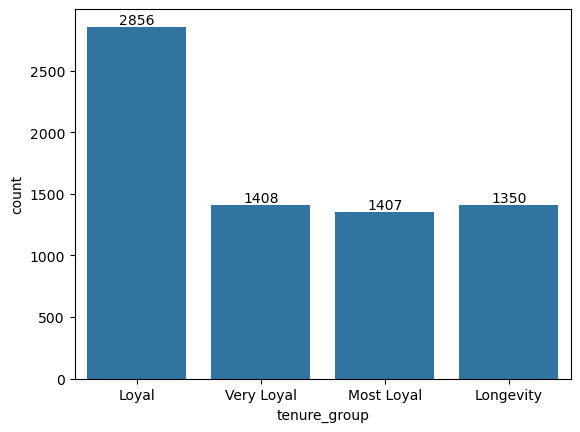

In [280]:
# Visualizing tenure_group feature in terms of bar distribution.
ax = sns.countplot(x="tenure_group", data=data);
values = data["tenure_group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

- 0- 20 = "Loyal"
- 21 - 40 = "Very Loyal"
- 41 - 60 = "Most Loyal"
- 61 - 80 = "Longevity"

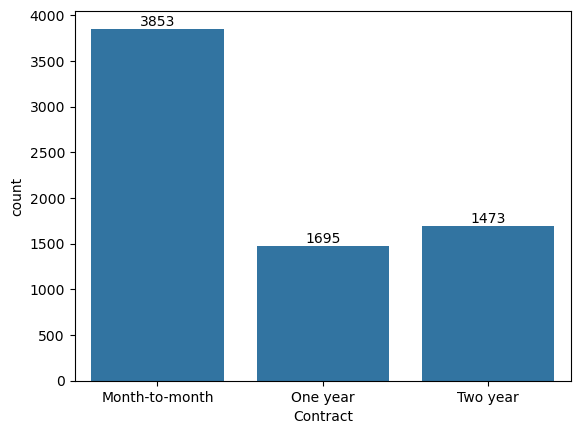

In [281]:
az = sns.countplot(x="Contract", data=data);
values = data["Contract"].value_counts(ascending=False).values
az.bar_label(container=az.containers[0], labels=values);

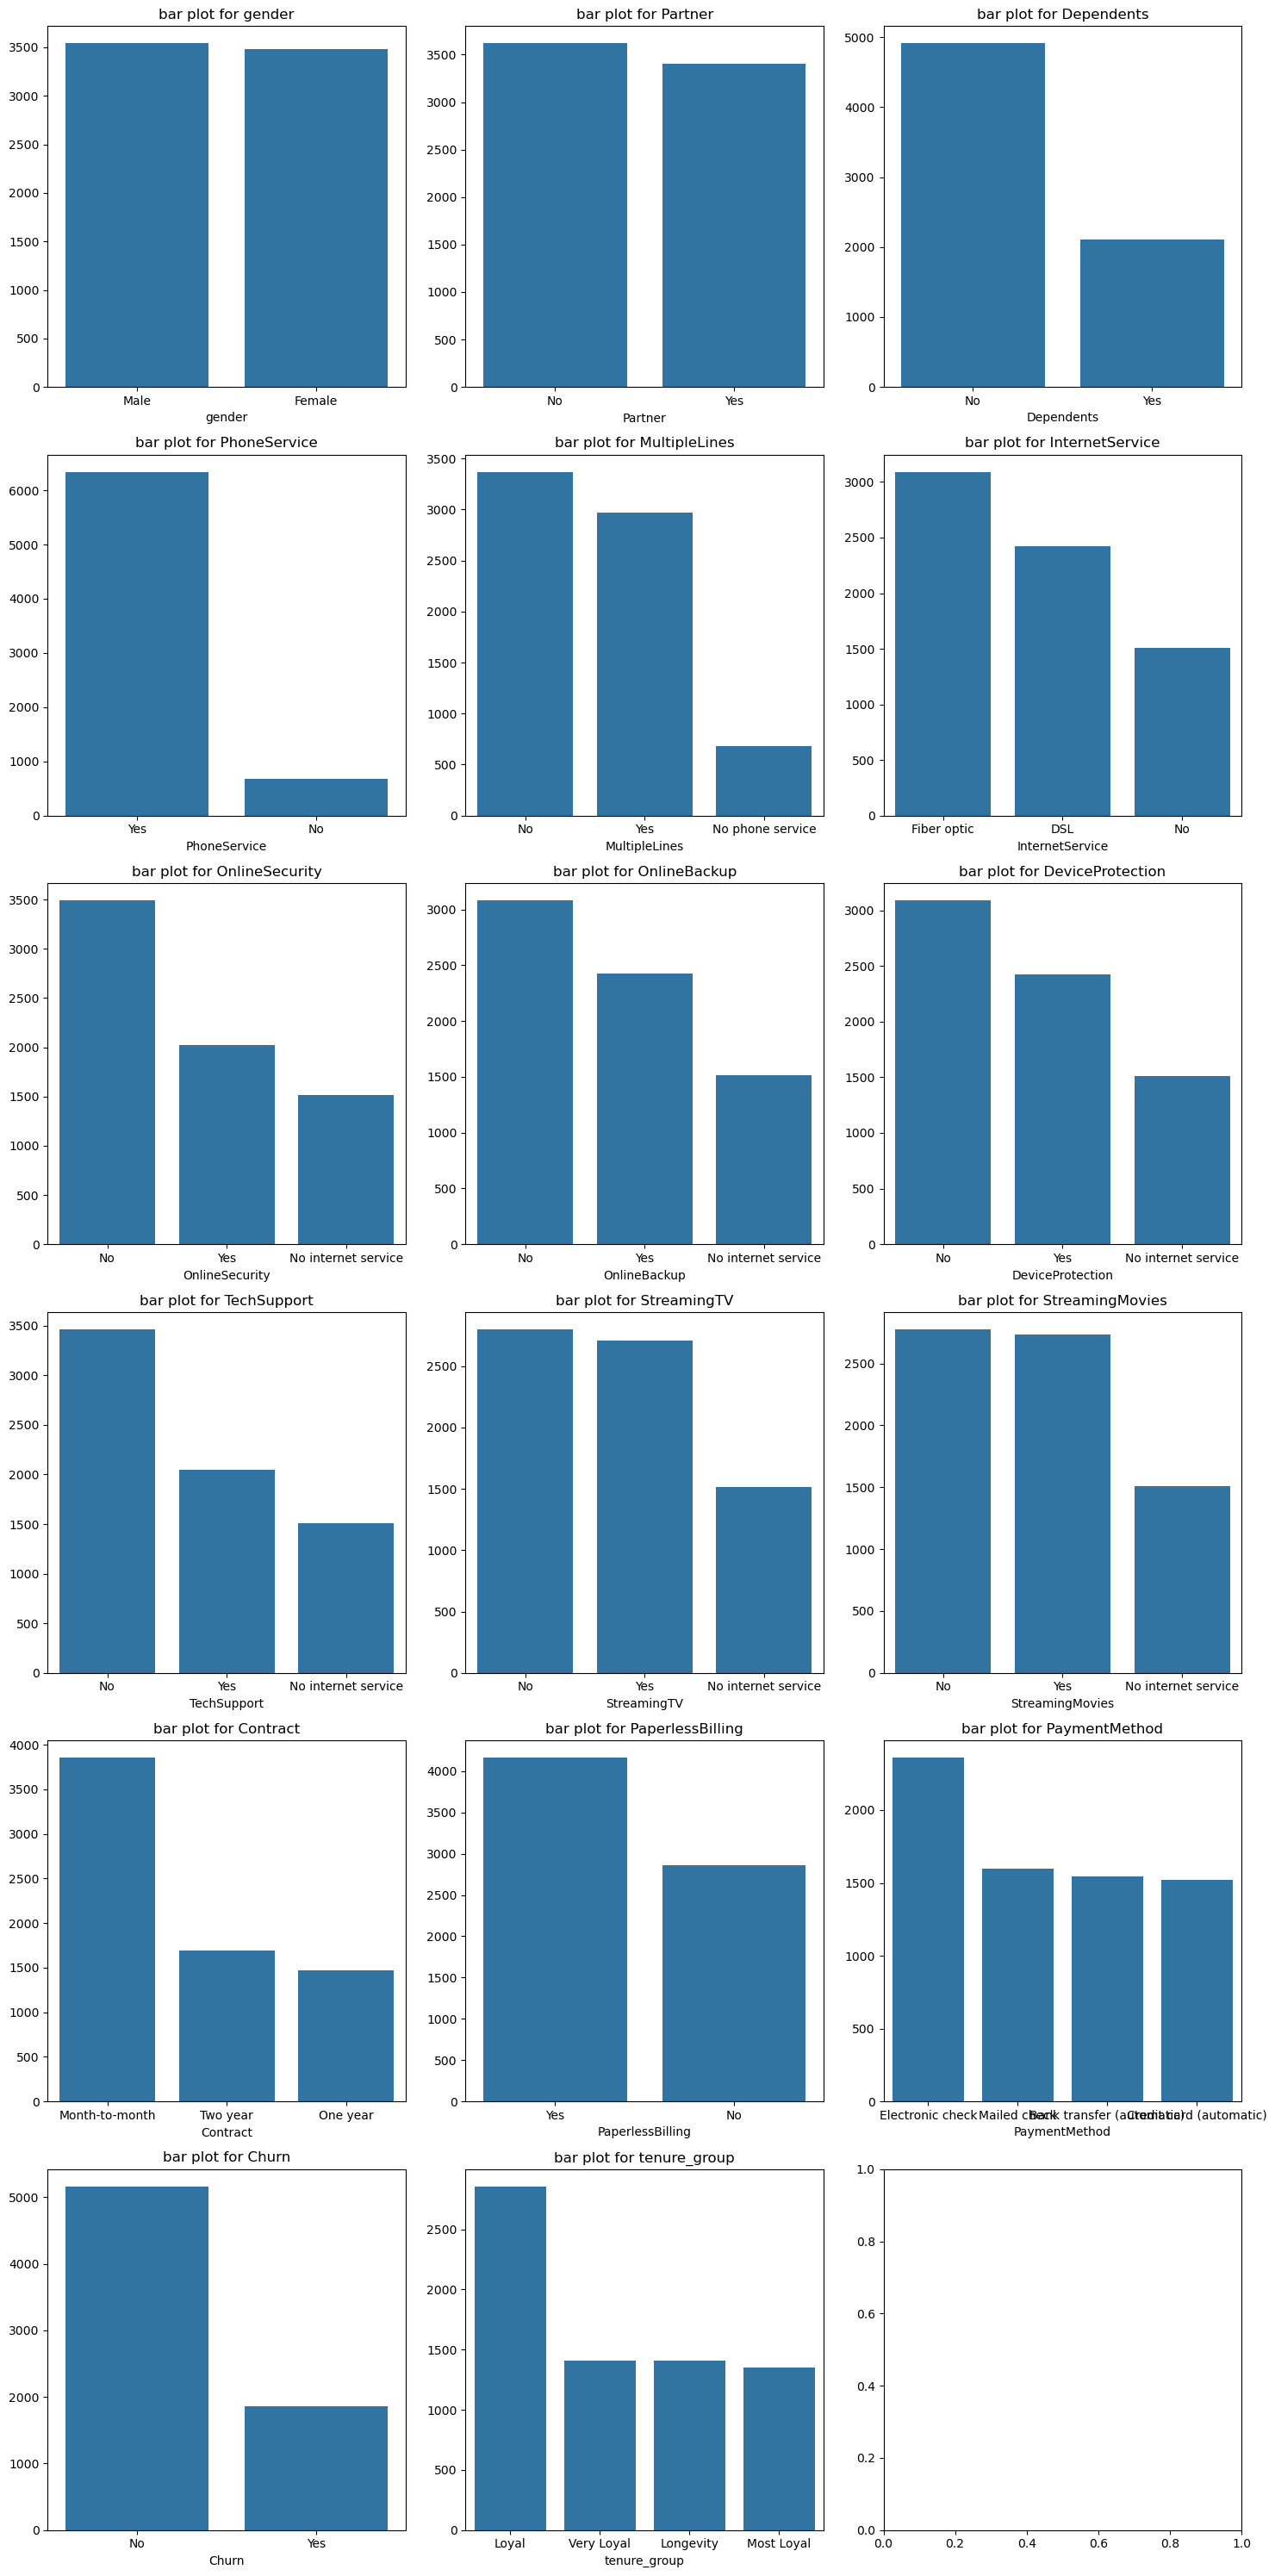

In [357]:
# Plotting Barchart for categorical features
fig, axes = plt.subplots(nrows=6, ncols=3, figsize = (15,30))

position = axes.flatten()

for index, feature in enumerate(cat_feat):
    sns.barplot(x = data[feature].value_counts().index, y = data[feature].value_counts().values, ax = position[index]) 
    position[index].set_title(f"bar plot for {feature}")
   
plt.savefig('bar_chart.jpeg')    
plt.tight_layout()
plt.show();


<Figure size 640x480 with 0 Axes>

In [283]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

### Bivariate Analysis

In [284]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

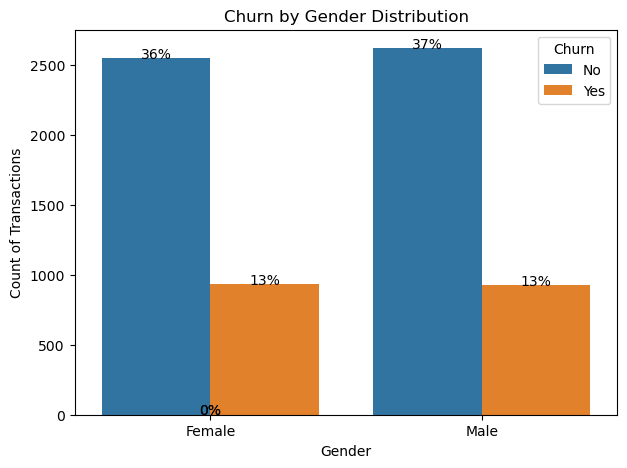

In [285]:
# Investigating churn by gender distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='gender', data=data, hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Count of Transactions')
plt.title('Churn by Gender Distribution')

# Add percentages to the bars
total_counts = len(data['gender'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

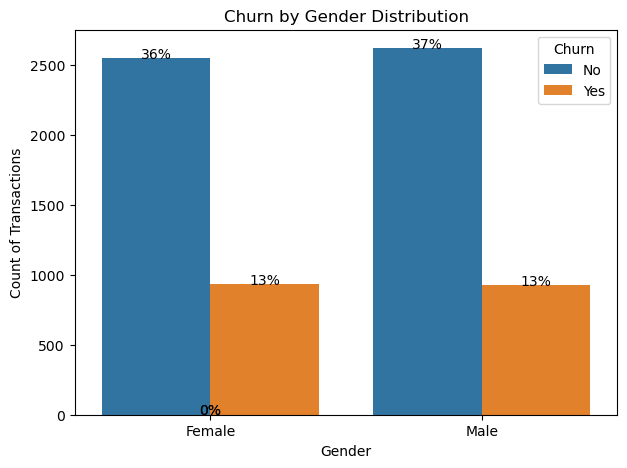

In [286]:
# Investigating churn by gender distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='gender', data=data, hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Count of Transactions')
plt.title('Churn by Gender Distribution')

# Add percentages to the bars
total_counts = len(data['gender'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

This chart shows attrition distribution by gender. Notice the global churn rate of 27% is evenly split between male and female subscribers at 13% each.

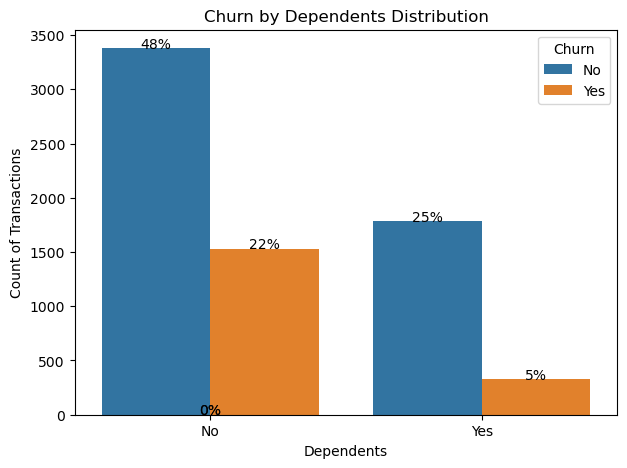

In [287]:
# Investigating churn by Dependents distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='Dependents', data=data, hue='Churn')
plt.xlabel('Dependents')
plt.ylabel('Count of Transactions')
plt.title('Churn by Dependents Distribution')

# Add percentages to the bars
total_counts = len(data['Dependents'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

The above viz illustrates the Dependents distribution by churn status. Subscribers who have dependents have churned at a lesser rate of 5% compared to subscribers with no dependents at 22%.

In [288]:
# Function that groups the SeniorCitizen feature into two groups. 

def senior (x):
    if x == 1:
        return 'Senior Citizen'
    else:
        return 'Ordinary Citizen'

# Creates new feature SeniorCitizen Group.
data['Citizen_Group']=data['SeniorCitizen'].apply(senior)

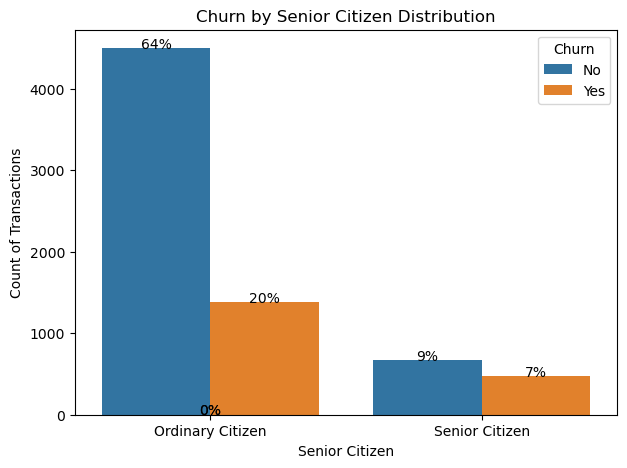

In [289]:
# Investigating churn by senior citizen distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Citizen_Group', data=data, hue='Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count of Transactions')
plt.title('Churn by Senior Citizen Distribution')

# Add percentages to the bars
total_counts = len(data['Citizen_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The above countplot char depicts the relationship between Senior & Not Senior Citizen subscribers by churn. Notice the bulk of the churn at Connecttel is in the not Senior Citizens category with 20% of the total churn while the Senior Citizens group accounted for just 7% of the total churn. This means subscribers in the not senior citizens category are cancelling their subscriptions more than subscribers in the senior citizen category.

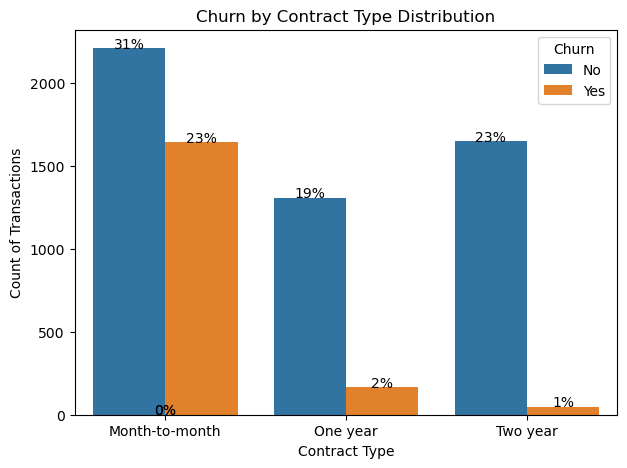

In [290]:
# Investigating churn by contract type distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Contract', data=data, hue='Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count of Transactions')
plt.title('Churn by Contract Type Distribution')

# Add percentages to the bars
total_counts = len(data['Contract'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The above visualization is a countplot showing the various contract types offered by Connecttel and their associated churn status. Notice the contract type with the highest churn rate is the Month-to-Month contract type with 23% while the other two are insignificant at 2% and 1% respectively. This shows that more subscribers on the Month-to-Month plan are cancelling their subscriptions compared to the other contract types.

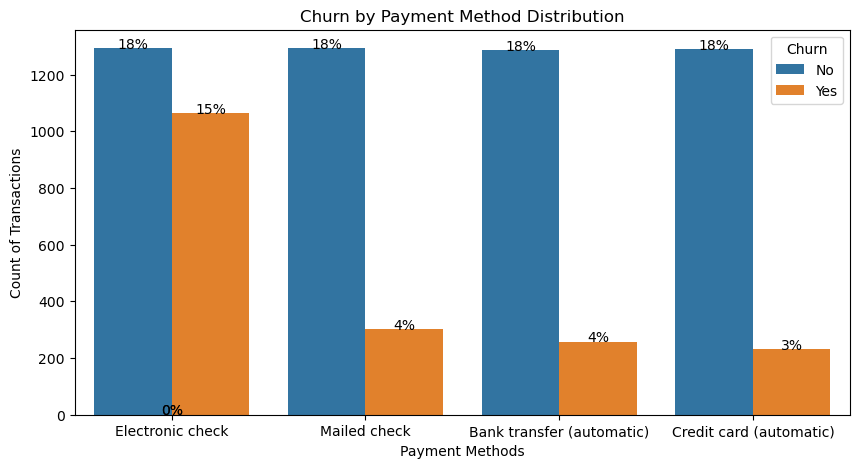

In [291]:
# Investigating churn by Payment Method distribution.

# Create countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='PaymentMethod', data=data, hue='Churn')
plt.xlabel('Payment Methods')
plt.ylabel('Count of Transactions')
plt.title('Churn by Payment Method Distribution')

# Add percentages to the bars
total_counts = len(data['PaymentMethod'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The chart above shows the payment method distribution at Connecttel by churn status. The payment method with the highest churn rate is Electronic Check at 15% followed by Mailed check at 4%, Bank transfer at 4% and credit card with the least at 3%. This clearly shows that Connecttel subscribers who use Electronic Check are dropping off and not using the channel to either complete or renew their subscriptions.

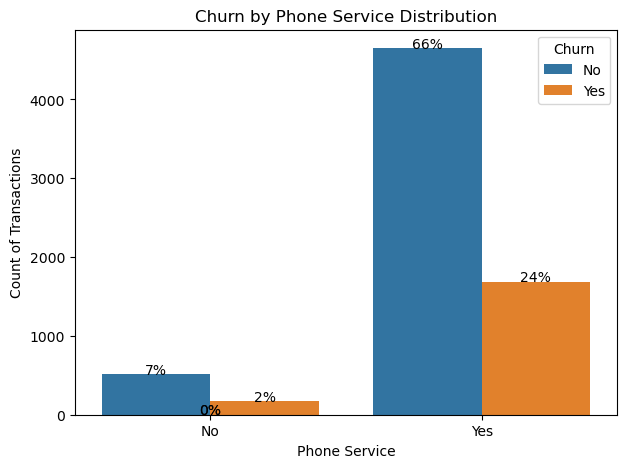

In [292]:
# Investigating Phone Service Distribution & churn. 

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='PhoneService', data=data, hue='Churn')
plt.xlabel('Phone Service')
plt.ylabel('Count of Transactions')
plt.title('Churn by Phone Service Distribution')

# Add percentages to the bars
total_counts = len(data['PhoneService'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The above viz illustrates the phone service distribution by churn status. Subscribers with phone service are more at risk of dropping-off or cancelling their subscription with a churn rate of 24% compared to subscribers with no phone service with a churn rate of 2%.

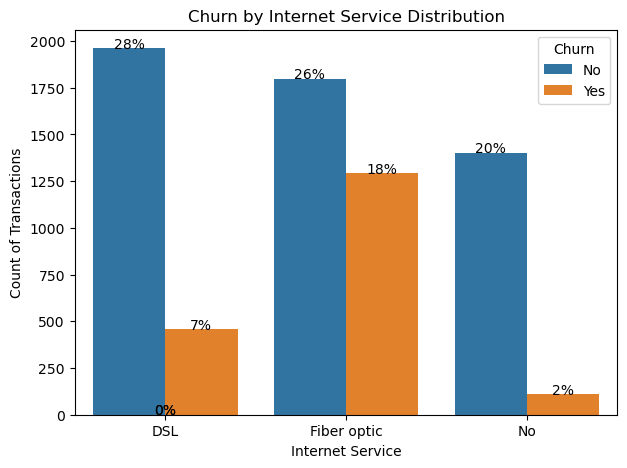

In [293]:
# Investigating churn by Internet Service distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='InternetService', data=data, hue='Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count of Transactions')
plt.title('Churn by Internet Service Distribution')

# Add percentages to the bars
total_counts = len(data['InternetService'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The chart above depicts the internet service distribution at Connecttel. The Fibre Optic service channel is clearly in distress with the highest churn rate of 18% compared to the other service channels - DSL at 7% and No internet service at 2%.

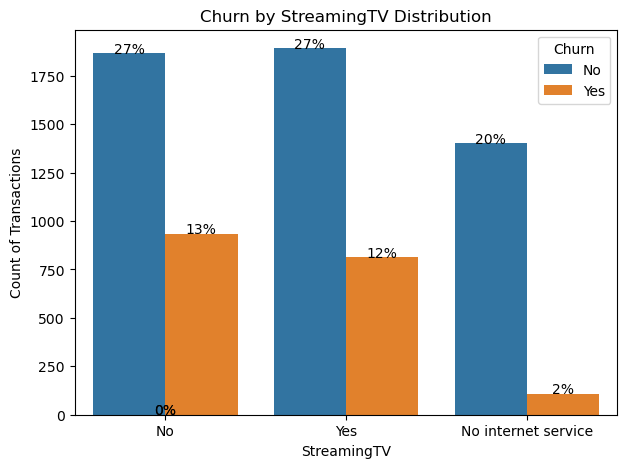

In [294]:
# Investigating churn by StreamingTV distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='StreamingTV', data=data, hue='Churn')
plt.xlabel('StreamingTV')
plt.ylabel('Count of Transactions')
plt.title('Churn by StreamingTV Distribution')

# Add percentages to the bars
total_counts = len(data['StreamingTV'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by StreamingTV distribution chart above, subscribers with and without StreamingTV options both have high churn rates at 12% and 15% respectively.

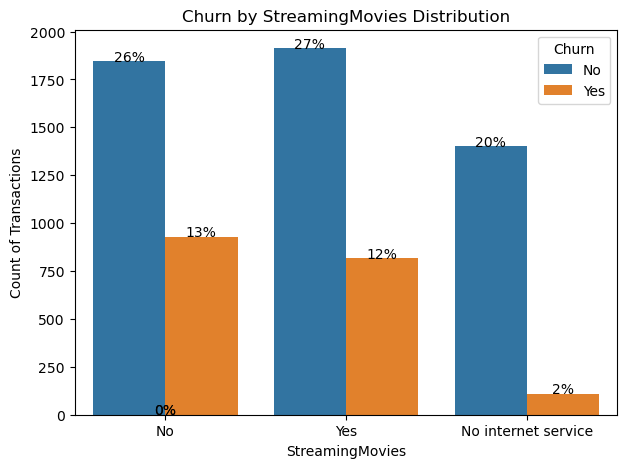

In [295]:
# Investigating churn by StreamingMovies distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='StreamingMovies', data=data, hue='Churn')
plt.xlabel('StreamingMovies')
plt.ylabel('Count of Transactions')
plt.title('Churn by StreamingMovies Distribution')

# Add percentages to the bars
total_counts = len(data['StreamingMovies'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by StreamingMovies distribution chart above, subscribers with and without StreamingMovies options both have high churn rates at 12% and 15% respectively.

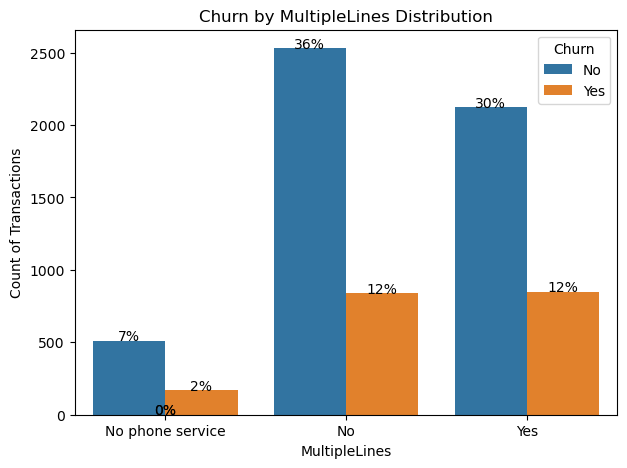

In [296]:
# Investigating churn by MultipleLines distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='MultipleLines', data=data, hue='Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Count of Transactions')
plt.title('Churn by MultipleLines Distribution')

# Add percentages to the bars
total_counts = len(data['MultipleLines'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by MultipleLines distribution chart above, subscribers with and without StreamingMovies options both have high churn rates at 12% and 14% respectively.

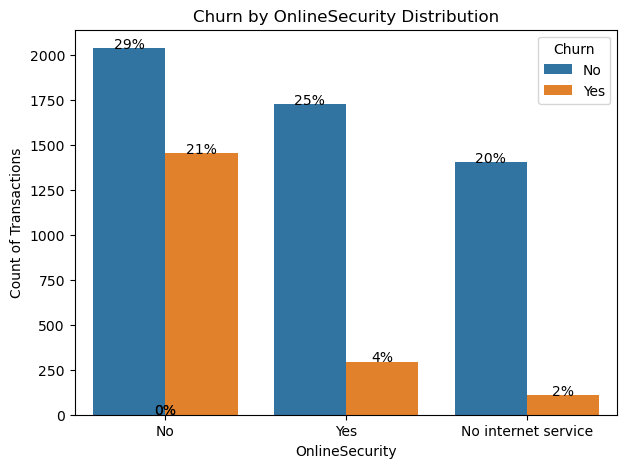

In [297]:
# Investigating churn by OnlineSecurity distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='OnlineSecurity', data=data, hue='Churn')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count of Transactions')
plt.title('Churn by OnlineSecurity Distribution')

# Add percentages to the bars
total_counts = len(data['OnlineSecurity'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by OnlineSecurity distribution chart above, subscribers without OnlineSecurity have a higher churn rate at 12% compared to subscribers with OnlineSecurity at 4%.

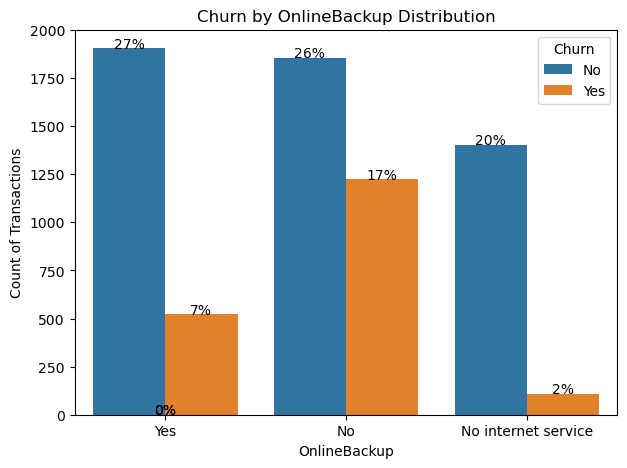

In [298]:
# Investigating churn by OnlineBackup distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='OnlineBackup', data=data, hue='Churn')
plt.xlabel('OnlineBackup')
plt.ylabel('Count of Transactions')
plt.title('Churn by OnlineBackup Distribution')

# Add percentages to the bars
total_counts = len(data['OnlineBackup'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by OnlineBackup distribution chart above, subscribers without OnlineBackup have a higher churn rate at 19% compared to subscribers with OnlineBackup at 7%.

## Multivariate Analysis
#### Categorical Features Analysis
This involves analyzing the relationship between three or more variables.

We would explore relationships between the categorical features and churn.


In [299]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group',
       'Citizen_Group'],
      dtype='object')

In [300]:
# tenure_group against MonthlyCharge and TotalCharges

Tenure = data.groupby("tenure_group")[["MonthlyCharges", "TotalCharges"]].sum().reset_index()

In [301]:
Tenure

,tenure_group,MonthlyCharges,TotalCharges
0,Longevity,106865.45,7.289202e+06
1,Loyal,163930.85,1.310448e+06
2,Most Loyal,93483.10,4.750766e+06
3,Very Loyal,91045.75,2.730154e+06


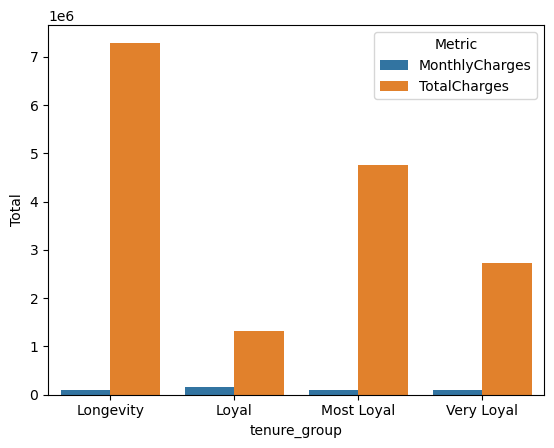

In [302]:
# Lets visualise

Tenure = data.groupby("tenure_group")[["MonthlyCharges", "TotalCharges"]].sum().reset_index()
Tenure = pd.melt(Tenure, id_vars="tenure_group", var_name="Metric", value_name="Total")
sns.barplot(data=Tenure, x='tenure_group', y="Total", hue="Metric");

- 0- 20 = "Loyal"
- 21 - 40 = "Very Loyal"
- 41 - 60 = "Most Loyal"
- 61 - 80 = "Longevity"

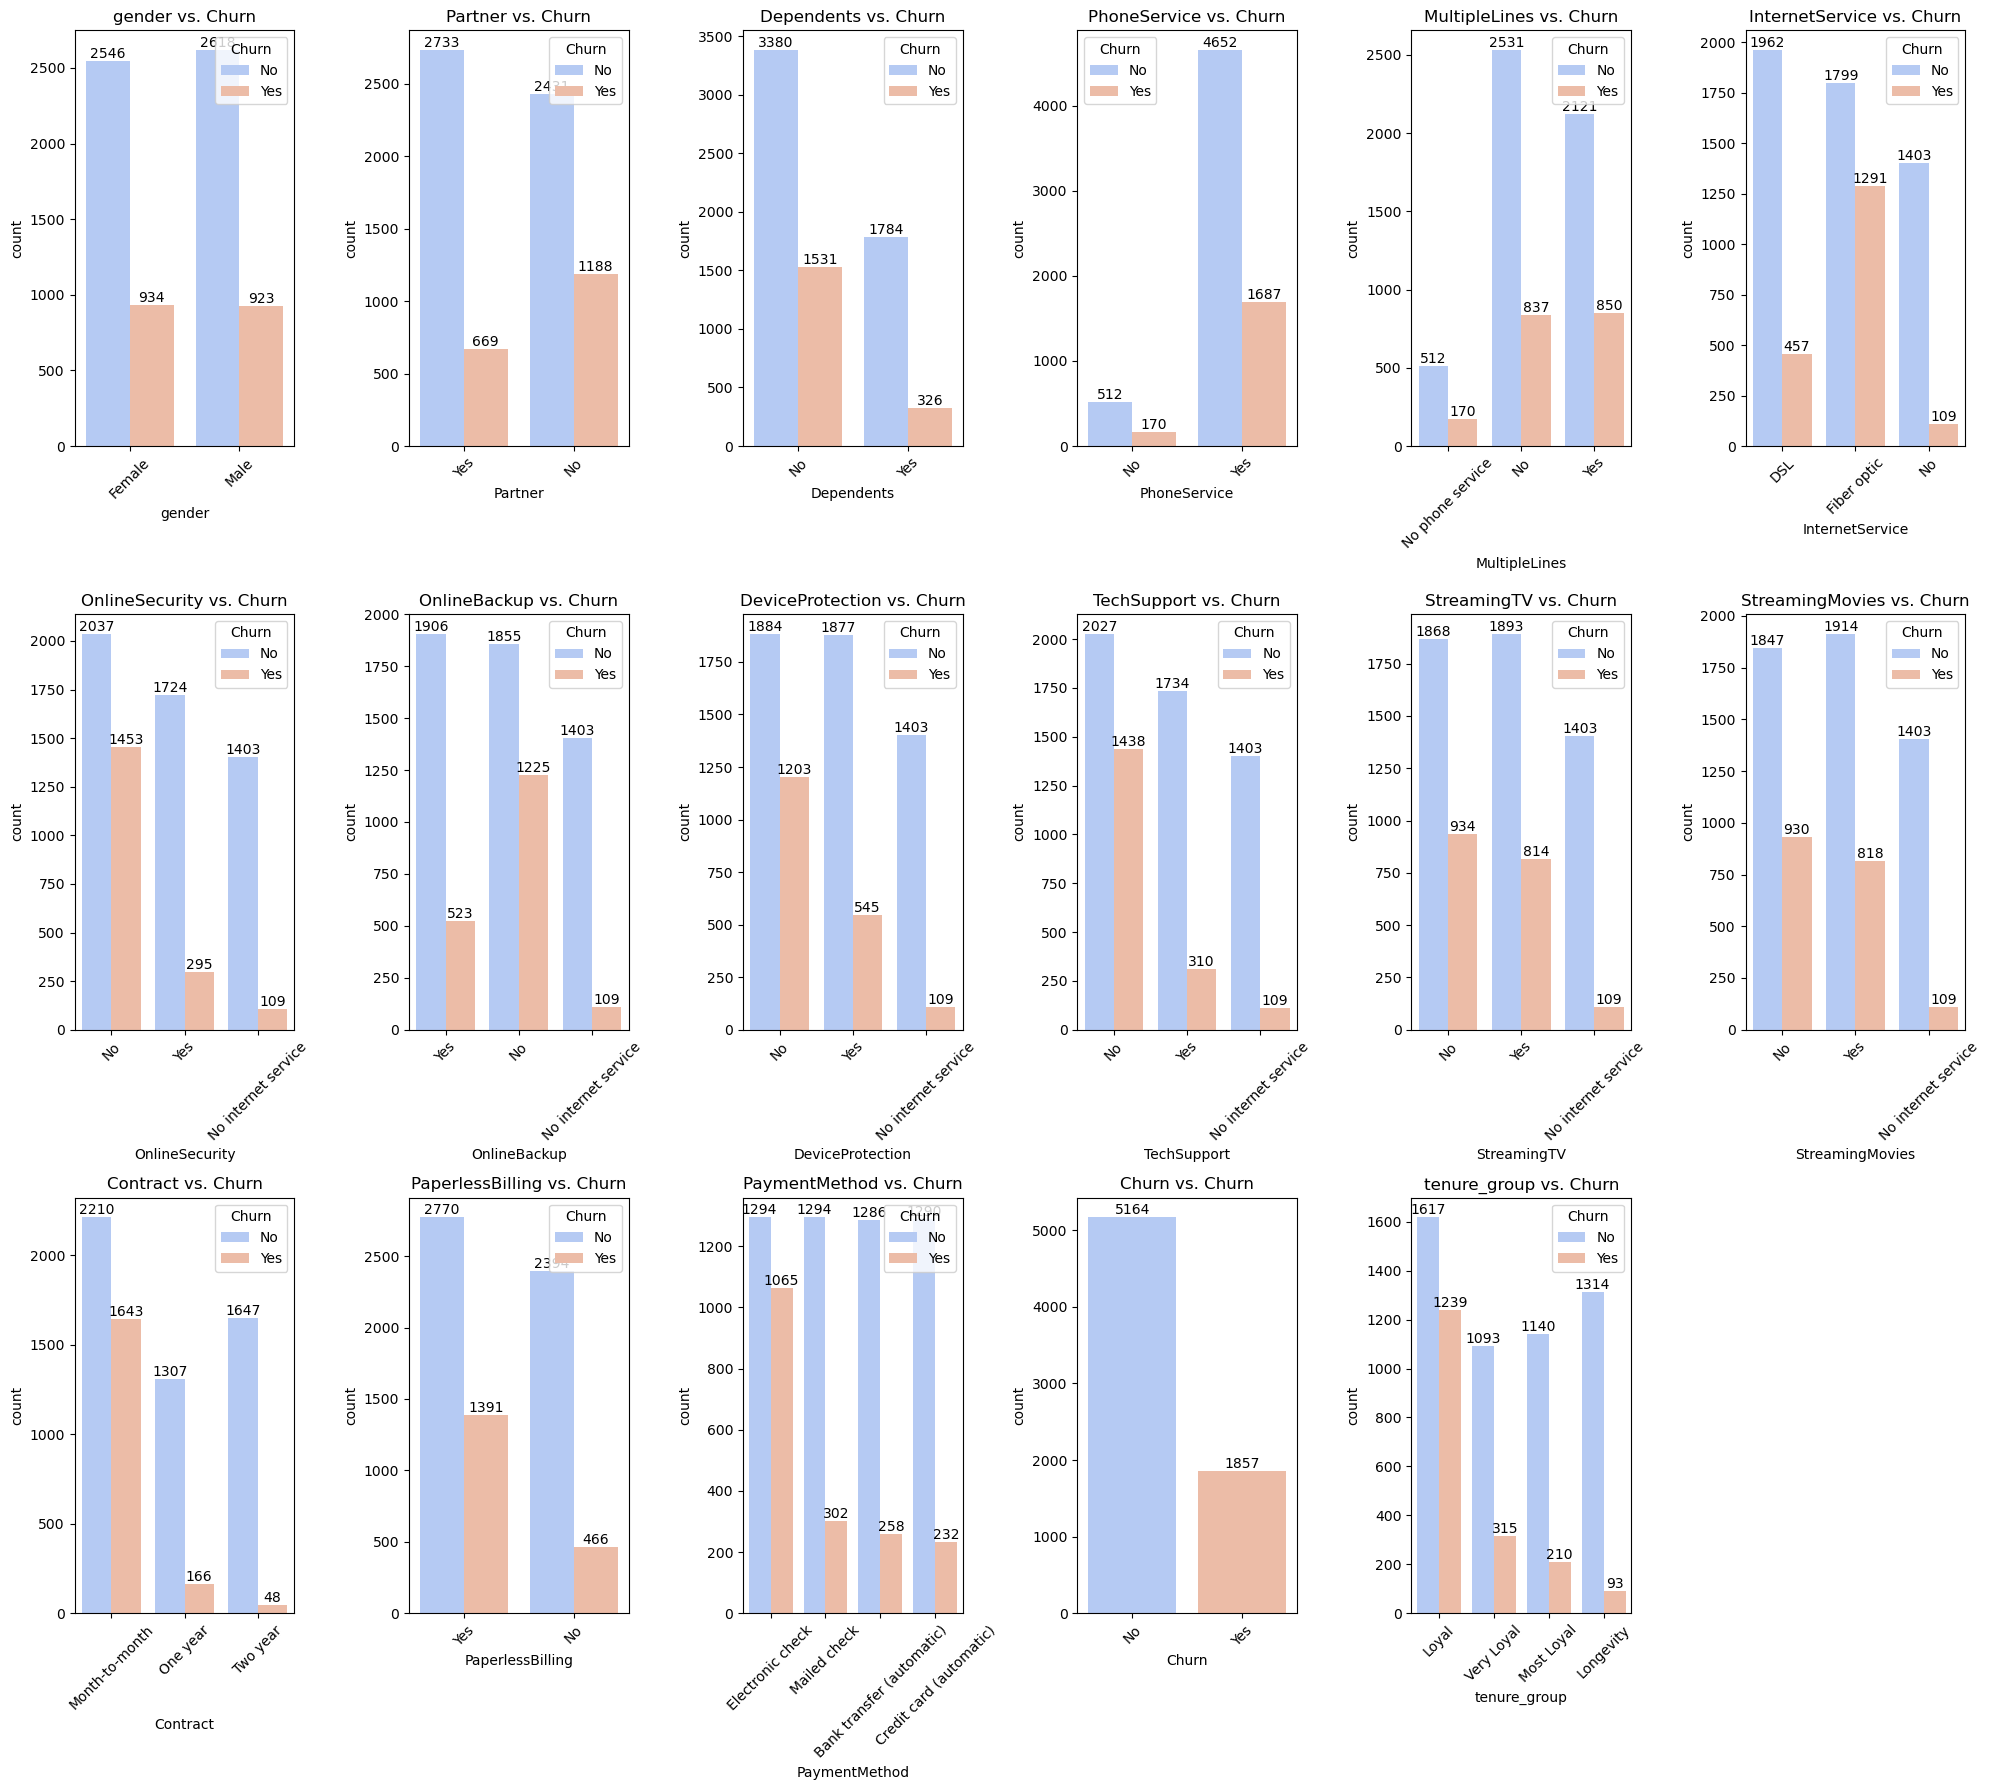

In [358]:
# Plotting relationships between the categorical features and churn.
plt.figure(figsize = (20, 18))

for index, feature in enumerate(cat_feat, 1):
    plt.subplot(3, 6, index)  # Adjust the number of rows and columns as needed
    ax = sns.countplot(data = data, x = feature, hue = 'Churn', palette = 'coolwarm')
    plt.title(f'{feature} vs. Churn')
    plt.xticks(rotation = 45)  # Rotate x labels if necessary
    ax.bar_label(ax.containers[0])  # Add labels for the first hue level (Churn = 0)No
    ax.bar_label(ax.containers[1])  # Add labels for the second hue level (Churn = 1)Yes
plt.savefig('Cat_churn.jpeg')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Insight from relationships between the categorical features and churn:

1.	Gender vs. Churn: The distribution of churn is relatively balanced between male and female customers, indicating no significant gender bias in churn behavior.
2.	SeniorCitizen vs. Churn: A higher proportion of senior citizens tend to churn compared to non-senior citizens, suggesting age might influence churn.
3.	Partner vs. Churn: Customers without partners have a higher churn rate, implying that single customers are more likely to churn than those with partners.
4.	Dependents vs. Churn: Customers without dependents are more likely to churn, indicating that having dependents might contribute to customer retention.
5.	PhoneService vs. Churn: Both customers with and without phone service show similar churn rates, suggesting phone service alone does not significantly impact churn.
6.	MultipleLines vs. Churn: Customers without multiple lines have a slightly higher churn rate, indicating that having multiple lines might be associated with lower churn.
7.	InternetService vs. Churn: Customers with fiber optic internet service have a higher churn rate compared to those with DSL or no internet service, indicating that fiber optic users might be more prone to churn.
8.	OnlineSecurity vs. Churn: Customers without online security services exhibit a higher churn rate, suggesting that offering online security might reduce churn.
9.	OnlineBackup vs. Churn: Customers without online backup services are more likely to churn, indicating that online backup services could be a factor in retention.
10.	DeviceProtection vs. Churn: Higher churn is observed among customers without device protection services, suggesting that device protection might help retain customers.
11.	TechSupport vs. Churn: Customers without tech support services have a higher churn rate, indicating that tech support could play a crucial role in customer retention.
12.	StreamingTV vs. Churn: Churn rates are higher among customers without streaming TV services, implying that offering streaming TV might reduce churn.
13.	StreamingMovies vs. Churn: Customers without streaming movies services show higher churn, suggesting that streaming movie services could be beneficial for retention.
14.	Contract vs. Churn: Customers with month-to-month contracts have a significantly higher churn rate compared to those with one or two-year contracts, indicating that longer contracts are associated with lower churn.
15.	PaperlessBilling vs. Churn: Higher churn rates are seen among customers with paperless billing, suggesting that paperless billing might be linked to hi
16.	PaymentMethod vs. Churn: Customers paying with electronic checks exhibit higher churn rates, whereas those using other payment methods like mailed checks, bank transfers, or credit cards show lower churn, indicating that payment method can influence churn.gher churn.
















#### Numerical Features Analysis

In [304]:
data.select_dtypes(exclude='object').corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015349,0.219434,0.101626
tenure,0.015349,1.000000,0.245251,0.824158
MonthlyCharges,0.219434,0.245251,1.000000,0.649939
TotalCharges,0.101626,0.824158,0.649939,1.000000


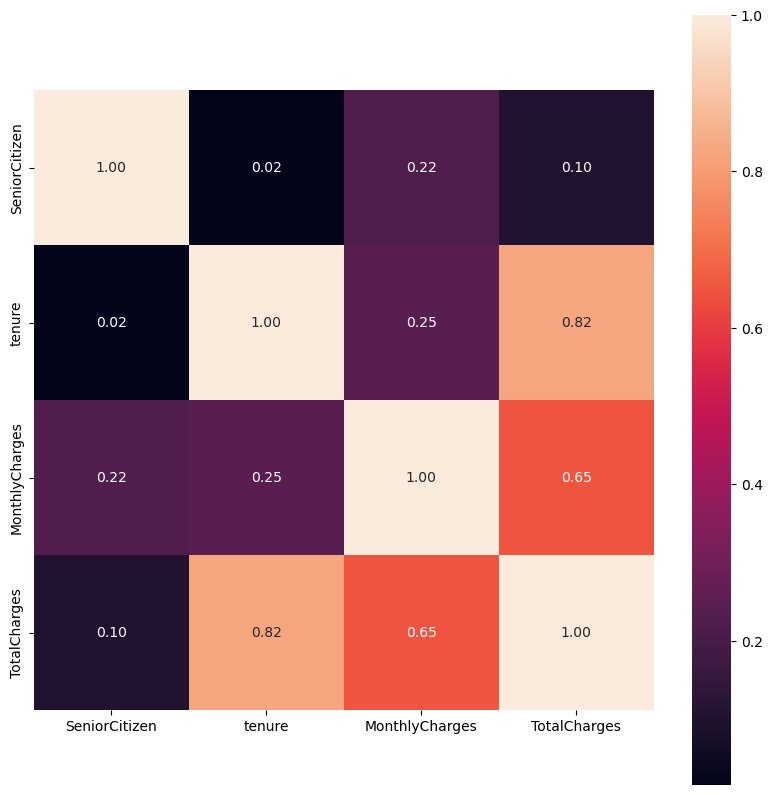

In [305]:
# correlation between SalePrice and other variable in the dataset
plt.figure(figsize = (10, 10))

hm = sns.heatmap(data.corr(numeric_only=True), cbar=True, annot=True, square=True, fmt='.2f',
                annot_kws={'size': 10})

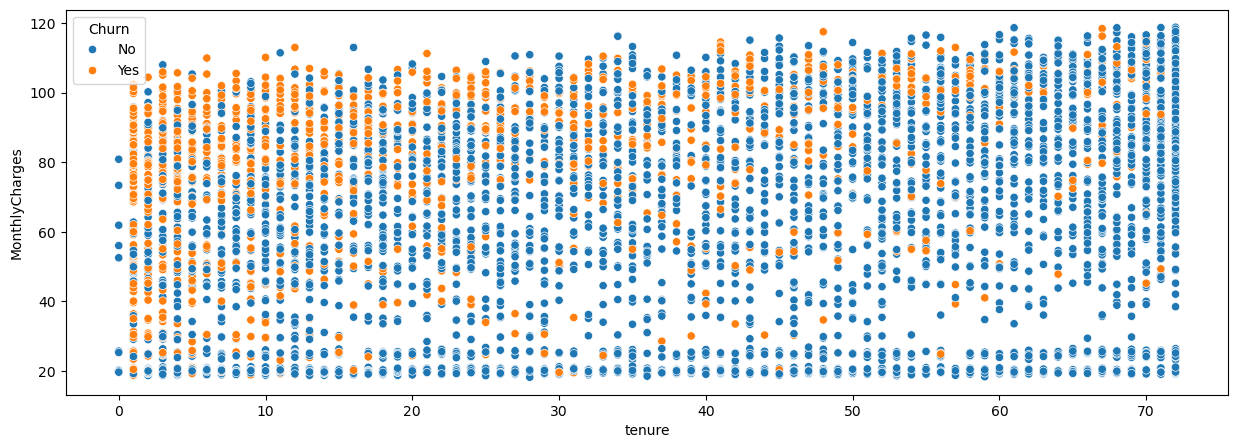

In [306]:
# Using a line chart to understand trends

plt.figure(figsize=(15,5))
sns.scatterplot(x='tenure', y="MonthlyCharges", data=data, hue='Churn');

More subscribers who pay higher monthly charges in the first few years of loyalty are churning more than subscribers who have stayed longer.

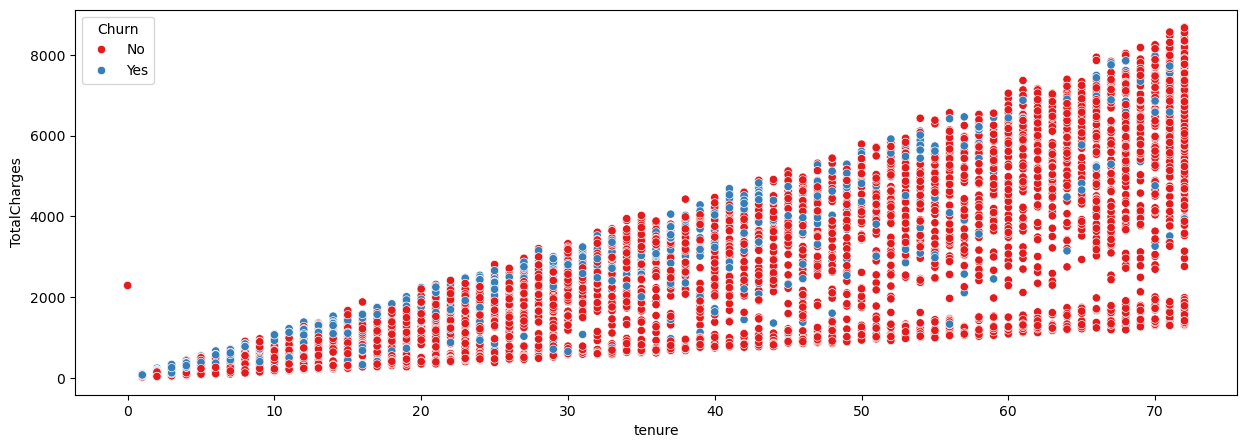

In [307]:
# Using a line chart to understand trends

plt.figure(figsize=(15,5))
sns.scatterplot(x='tenure', y="TotalCharges", data=data, hue='Churn', palette='Set1');

The chart above reveals that subscribers who pay the most in totalcharges in each year of loyalty churn the most except for subscribers with a longevity period of over 60 years.

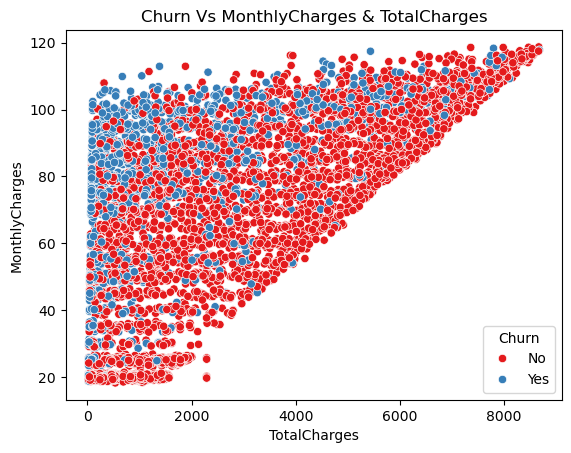

In [308]:
# Visualizing the relationship between Monthly & Total Charges by Churn

# Create a scatterplot with 'MonthlyCharges' on the x-axis and 'TotalCharges' on the y-axis, with 'Churn' as hue
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', data=data, hue='Churn', palette='Set1')

# Customize the plot
plt.title("Churn Vs MonthlyCharges & TotalCharges")

plt.show();

The chart above reveals the relationship between monthly and total charges by churn. It shows that Connecttel subscribers on higher monthly charges are more likely to churn compared to subscribers on lower monthly charges while in terms of total charges, subscribers on the lower end of the spectrum are more likely to churn compared to subscribers at the higher end. This is in sync with the distribution of both monthly & total charges by churn earlier analyzed.

### 5. Feature Engineering

In [309]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,Citizen_Group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Loyal,Ordinary Citizen
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Very Loyal,Ordinary Citizen
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Loyal,Ordinary Citizen
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Most Loyal,Ordinary Citizen
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Loyal,Ordinary Citizen


In [310]:
print(data.shape)

(7021, 22)


In [311]:
# function to convert target feature into 1 and 0 and create a new feature - Churn-Type

def attrition(x):
    if x == 'Yes':
        return 0
    else:
        return 1

# Apply the function in Churn feature
data['Churn_Type']=data['Churn'].apply(attrition)

I used the attrition function to perform a feature construction by creating a new feature called - Churn_Type and converting the variables from object to numeric datatype. Also, I adopted a binary positive labelling scheme to label the outcomes as 0 for Churn and 1 for Not Churn.

In [312]:
# Create a deep copy of data and assign it to data_1
data_1 = data.copy()

# Now, data_1 is a separate DataFrame with the same data as data

In [313]:
data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,Citizen_Group,Churn_Type
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Loyal,Ordinary Citizen,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,Very Loyal,Ordinary Citizen,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Loyal,Ordinary Citizen,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Most Loyal,Ordinary Citizen,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Loyal,Ordinary Citizen,0


In [314]:
# Segment the dataframe into target_label
target_label=data_1[['Churn_Type']]

In [315]:
target_label.head()

,Churn_Type
0,1
1,1
2,0
3,1
4,0


In [316]:
data_1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_group         object
Citizen_Group        object
Churn_Type            int64
dtype: object

In [317]:
# Select only relevant features required to train my model and store in a new dataframe (data_2). Drop-off irrelevant categorical columns used for earlier visualization.

data_2 =data_1[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

Performed a feature extraction by dropping-off irrelevant features which include Churn, SeniorCitizen_Group, Tenure_Group and assigning the new dataframe as data_2. The purpose is to ensure my model performs optimally and it's as accurate as possible.

In [318]:
data_2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [319]:
# Label Encoding 

# Function to convert all categorical features in the dataset to numerical values. 
from sklearn.preprocessing import LabelEncoder

# Method initialization
encoder=LabelEncoder()

# Looping for columns except survived 
for c in data_2.columns [0:]:
    if (data_2[c].dtype=='object'):
        data_2[c]=encoder.fit_transform(data_2[c])
    else:
        data_2[c]=data_2[c]

In [320]:
data_2.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [321]:
data_2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [322]:
# Normalizing or standardizing the features in the dataset.

from sklearn.preprocessing import MinMaxScaler
''' Assign the MinMaxScaler function to the variable scaler '''
scaler=MinMaxScaler()

''' Reshape each feature with outlier using the scaler-fit-transform function and assigned to new features'''
data_2['Scaled_MC']=scaler.fit_transform(data_2[['MonthlyCharges']].values.reshape(-1,1))
data_2['Scaled_TC']=scaler.fit_transform(data_2[['TotalCharges']].values.reshape(-1,1))
data_2['Scaled_Tenure']=scaler.fit_transform(data_2[['tenure']].values.reshape(-1,1))


''' Drop-off the irrelevant features '''
data_2.drop(['MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)

data_2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Scaled_MC,Scaled_TC,Scaled_Tenure
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0.013889
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0.472222
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,0.027778
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0.625000
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,0.027778


Performing feature scaling on the MonthlyCharges, TotalCharges and tenure features by normalizing them inorder to avoid biases towards higher variables and improve performance of my ML model.

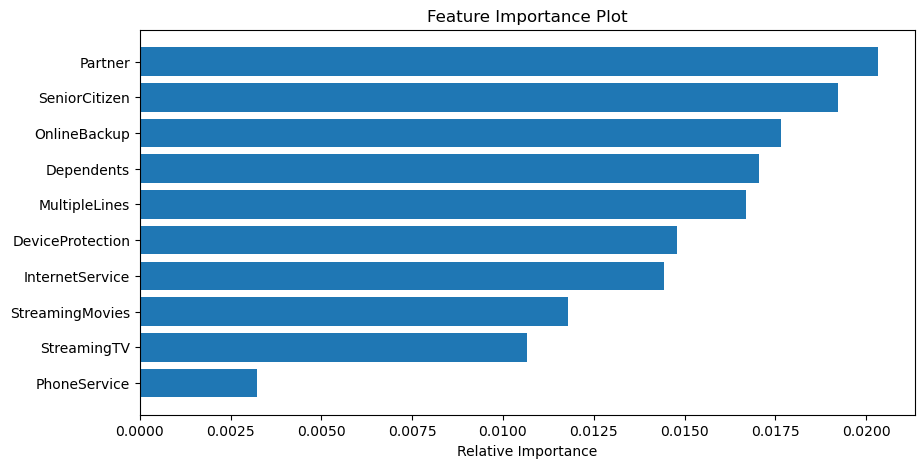

In [359]:
# Checking for the important features to the target variable 

from sklearn.ensemble import RandomForestRegressor

feat_im=RandomForestRegressor()
feat_im.fit(data_2, target_label)
feat_name=list(data_2.columns)
importances=feat_im.feature_importances_
indices=np.argsort(importances)[:10]

plt.figure(figsize=(10,5))
plt.barh(range(len(indices)), importances[indices],align='center')
plt.yticks(range(len(indices)), [feat_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance Plot');

The above features ranked in the order of importance are the most relevant features in the dataframe which determines the outcome of the target variable. In this context, there determine whether a Connecttel subscriber will churn or not.

### Data Splitting

In [324]:
# Split the dataset into both training and test datasets. 

x_train, x_test, y_train, y_test = train_test_split(data_2, target_label, test_size=0.2, random_state=42)

In [325]:
# Shape of the dataset
data_2.shape

(7021, 19)

In [326]:
# Shape of the target feature 
target_label.shape

(7021, 1)

In [327]:
x_train.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Scaled_MC,Scaled_TC,Scaled_Tenure
3276,0,0,0,0,1,0,1,0,0,0,0,0,2,0,1,2,0.605970,0.034439,0.055556
6266,1,1,0,0,1,2,1,0,2,2,0,0,0,0,1,1,0.652736,0.311274,0.458333
1324,0,0,1,1,1,0,2,1,1,1,1,1,1,0,0,3,0.020896,0.006641,0.055556


In [328]:
y_train.head()

,Churn_Type
3276,0
6266,0
1324,0
5201,1
4080,1


In [329]:
target_label.head(6)

,Churn_Type
0,1
1,1
2,0
3,1
4,0
5,0


In [330]:
x_test.head(6)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Scaled_MC,Scaled_TC,Scaled_Tenure
3918,1,0,1,1,1,0,1,0,0,0,0,2,2,0,1,2,0.715920,0.202833,0.277778
2467,1,0,1,1,1,2,1,0,0,0,2,2,2,1,1,2,0.793035,0.565324,0.680556
2885,1,1,0,0,1,2,1,2,2,2,2,2,2,2,1,1,0.973632,0.902498,0.930556
3770,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,0,0.016418,0.126564,0.791667
3753,1,0,0,0,0,1,0,0,0,0,2,0,0,0,0,3,0.108458,0.001194,0.013889
4493,0,0,0,1,1,2,2,1,1,1,1,1,1,2,0,1,0.070149,0.050294,0.250000


#### Model Selection

In [348]:
# Building a Logistic Regression Model
logreg=LogisticRegression()

# Train the model
logreg.fit(x_train, y_train)

# Predict the model
ly_pred=logreg.predict(x_test)

# Evaluate the model. 
print("Logistic Regression Model")
print()
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-Score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression Model

Accuracy: 0.797153024911032
Precision: 0.8503649635036497
Recall: 0.8850902184235517
F1-Score: 0.8673801768264309
AUC-ROC: 0.7095905637572304


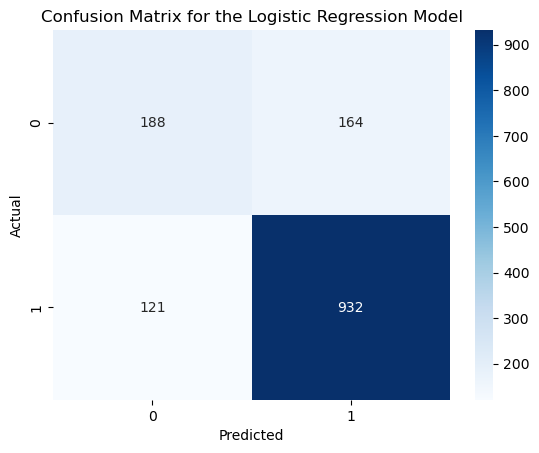

In [332]:
# Building a Confusion Matrix for the Logistic Regression Model
lcm=confusion_matrix(y_test, ly_pred)

#Visualize the Confusion Matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Logistic Regression Model')
plt.show();

In [333]:
# Building a Random Forest Classifier Model
rfc=RandomForestClassifier()

# Train the model
rfc.fit(x_train, y_train)

# Predict the model
rfc_pred=rfc.predict(x_test)

# Evaluate the model
print("Random Forest Model")
print()
print("Accuracy:", accuracy_score(y_test, rfc_pred))
print("Precision:", precision_score(y_test, rfc_pred))
print("Recall:", recall_score(y_test, rfc_pred))
print("F1-Score:", f1_score(y_test, rfc_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfc_pred))

Random Forest Model

Accuracy: 0.7850533807829182
Precision: 0.8373764600179695
Recall: 0.8850902184235517
F1-Score: 0.8605724838411819
AUC-ROC: 0.6854428364845031


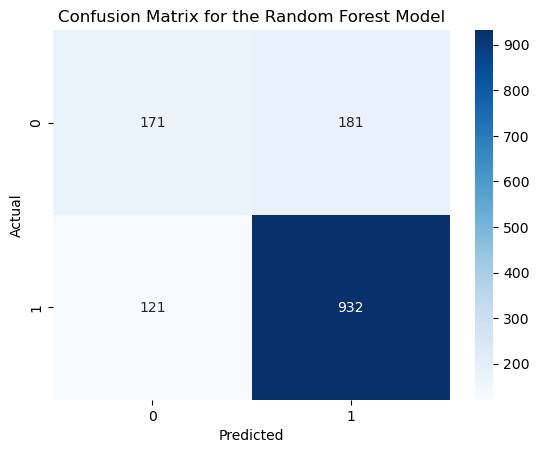

In [334]:
# Building a Confusion Matrix for the Random Forest Classifier 
rcm=confusion_matrix(y_test, rfc_pred)

#Visualize the Confusion Matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Random Forest Model')
plt.show();

In [335]:
# Building a XGBClassifier Model
xgb=XGBClassifier()

# Train the model
xgb.fit(x_train, y_train)

# Predict the model
xgb_pred=xgb.predict(x_test)

# Evaluate the model
print("XGBClassifier Model")
print()
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1-Score:", f1_score(y_test, xgb_pred))
print("AUC-ROC:", roc_auc_score(y_test, xgb_pred))

XGBClassifier Model

Accuracy: 0.7665480427046263
Precision: 0.8322639780018332
Recall: 0.862298195631529
F1-Score: 0.8470149253731343
AUC-ROC: 0.6712059159975826


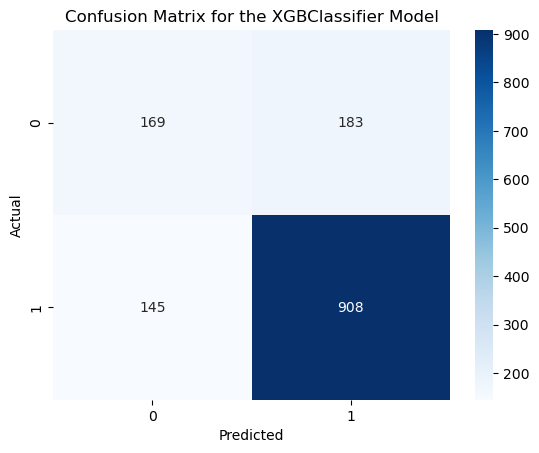

In [336]:
# Building a Confusion Matrix for the XGBClassifier Classifier 
xgbc=confusion_matrix(y_test, xgb_pred)

#Visualize the Confusion Matrix
sns.heatmap(xgbc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the XGBClassifier Model')
plt.show();

In [337]:
# Building a Naive Baye Classifier Model
nb=GaussianNB()

# Train the model
nb.fit(x_train, y_train)

# Predict the model
nb_pred=nb.predict(x_test)

# Evaluate the model
print("Naive Baye Model")
print()
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred))
print("Recall:", recall_score(y_test, nb_pred))
print("F1-Score:", f1_score(y_test, nb_pred))
print("AUC-ROC:", roc_auc_score(y_test, nb_pred))

Naive Baye Model

Accuracy: 0.7487544483985765
Precision: 0.9013761467889908
Recall: 0.7464387464387464
F1-Score: 0.8166233766233766
AUC-ROC: 0.7510602823102822


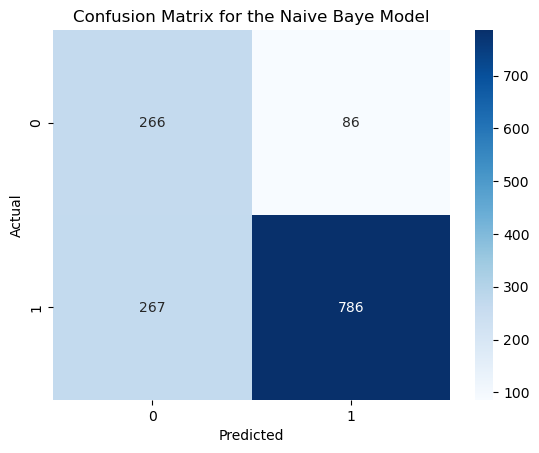

In [338]:
# Building a Confusion Matrix for the Naive Baye Classifier 
nbc=confusion_matrix(y_test, nb_pred)

#Visualize the Confusion Matrix
sns.heatmap(nbc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Naive Baye Model')
plt.show();

In [339]:
# Building a  SGDClassifier Model
sgdc=SGDClassifier()

# Train the model
sgdc.fit(x_train, y_train)

# Predict the model
sgdc_pred=sgdc.predict(x_test)

# Evaluate the model. 
print("SGDClassifier Model")
print()
print("Accuracy:", accuracy_score(y_test, sgdc_pred))
print("Precision:", precision_score(y_test, sgdc_pred))
print("Recall:", recall_score(y_test, sgdc_pred))
print("F1-Score:", f1_score(y_test, sgdc_pred))
print("AUC-ROC:", roc_auc_score(y_test, sgdc_pred))

SGDClassifier Model

Accuracy: 0.7943060498220641
Precision: 0.8204697986577181
Recall: 0.9287749287749287
F1-Score: 0.8712694877505568
AUC-ROC: 0.6604101916601917


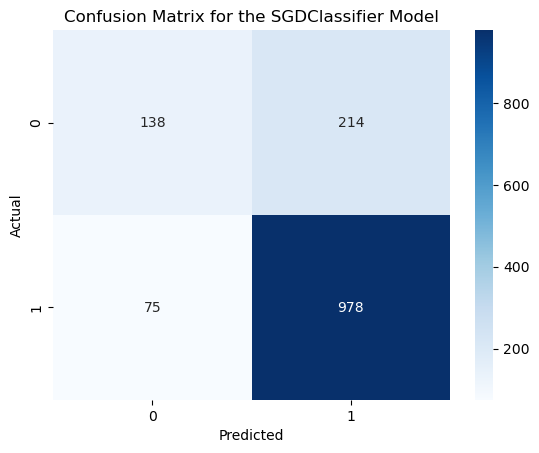

In [340]:
# Building a Confusion Matrix for the SGDClassifier Model
sgdcm=confusion_matrix(y_test, sgdc_pred)

#Visualize the Confusion Matrix
sns.heatmap(sgdcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the SGDClassifier Model')
plt.show();

In [341]:
# Building a  KNeighborsClassifier Model
kb=KNeighborsClassifier()

# Train the model
kb.fit(x_train, y_train)

# Predict the model
kb_pred=kb.predict(x_test)

# Evaluate the model. 
print("KNeighborsClassifier Model")
print()
print("Accuracy:", accuracy_score(y_test, kb_pred))
print("Precision:", precision_score(y_test, kb_pred))
print("Recall:", recall_score(y_test, kb_pred))
print("F1-Score:", f1_score(y_test, kb_pred))
print("AUC-ROC:", roc_auc_score(y_test, kb_pred))

KNeighborsClassifier Model

Accuracy: 0.7580071174377224
Precision: 0.8341143392689785
Recall: 0.8452041785375118
F1-Score: 0.8396226415094339
AUC-ROC: 0.6711816347233014


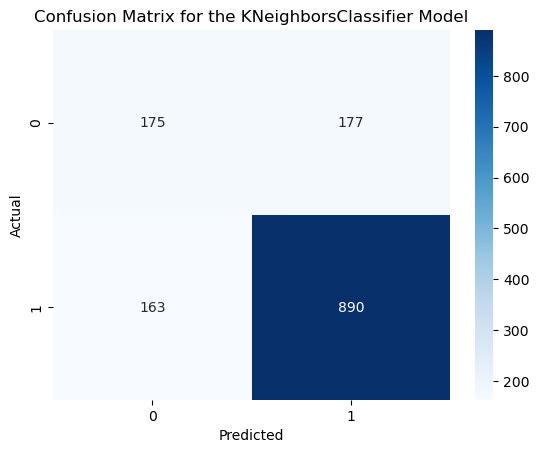

In [342]:
# Building a Confusion Matrix for the KNeighborsClassifier Model
kbcm=confusion_matrix(y_test, kb_pred)

#Visualize the Confusion Matrix
sns.heatmap(kbcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the KNeighborsClassifier Model')
plt.show();

In [343]:
# Building a DecisionTreeClassifier Model
DT=DecisionTreeClassifier()

# Train the model
DT.fit(x_train, y_train)

# Predict the model
DT_pred=DT.predict(x_test)

# Evaluate the model. 
print("DecisionTreeClassifier Model")
print()
print("Accuracy:", accuracy_score(y_test, DT_pred))
print("Precision:", precision_score(y_test, DT_pred))
print("Recall:", recall_score(y_test, DT_pred))
print("F1-Score:", f1_score(y_test, DT_pred))
print("AUC-ROC:", roc_auc_score(y_test, DT_pred))

DecisionTreeClassifier Model

Accuracy: 0.7373665480427046
Precision: 0.8301158301158301
Recall: 0.8167141500474834
F1-Score: 0.8233604595500239
AUC-ROC: 0.6583570750237417


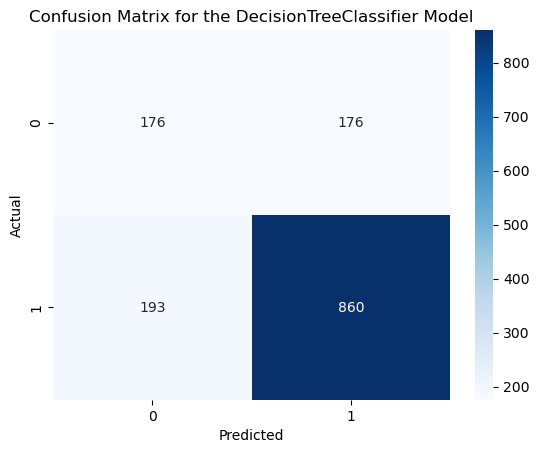

In [344]:
# Building a Confusion Matrix for the DecisionTreeClassifier Model
DTcm=confusion_matrix(y_test, DT_pred)

#Visualize the Confusion Matrix
sns.heatmap(DTcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the DecisionTreeClassifier Model')
plt.show();

In [345]:
# Building a SVC Model
sv=SVC()

# Train the model
sv.fit(x_train, y_train)

# Predict the model
sv_pred=sv.predict(x_test)

# Evaluate the model. 
print("SVC Model")
print()
print("Accuracy:", accuracy_score(y_test, sv_pred))
print("Precision:", precision_score(y_test, sv_pred))
print("Recall:", recall_score(y_test, sv_pred))
print("F1-Score:", f1_score(y_test, sv_pred))
print("AUC-ROC:", roc_auc_score(y_test, sv_pred))

SVC Model

Accuracy: 0.7879003558718861
Precision: 0.8337754199823165
Recall: 0.8955365622032289
F1-Score: 0.8635531135531135
AUC-ROC: 0.6807228265561599


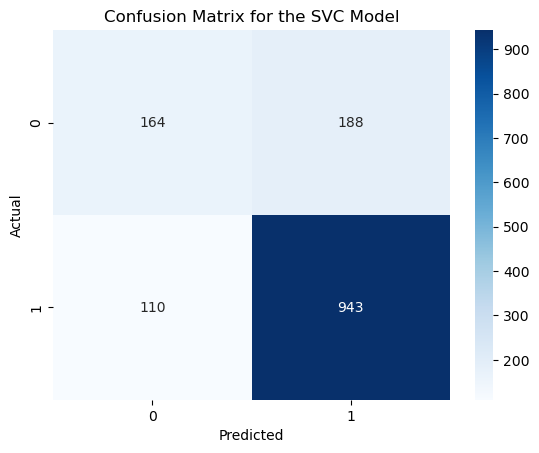

In [346]:
# Building a Confusion Matrix for the SVC Model
svcm=confusion_matrix(y_test, sv_pred)

#Visualize the Confusion Matrix
sns.heatmap(svcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the SVC Model')
plt.show();

#### Insights and Recommendations Stemming from Confusion Matrix

### Model Interpretation

Model Selection:
I selected eight(8) classifier models to enable me label and train the dataset. These models are as shown below:

- Logistic Regression Model
- Support Vector Classifier (SVC) Model
- XGBClassifier Model
- Naive Baye Classifier
- SGDClassifier Model
- KNeighborsClassifier Model
- DecisionTreeClassifier Model
- SVC Mode

**To evaluate the performance of these models, the following metrics were employed:**
- Accuracy
- Precision
- Recall (Sensitivity or True Positive Rate)
- F1-Score
- AUC-ROC

**Interpretation of Model Evaluation Metrics**
Accuracy - The models recorded an accuracy score as shown below:
- Logistic Regression : 0.8168
- Support Vector Classsifier : 0.8161
- GBClassifier : 0.7941
- Naive Baye Classifier: 
- SGDClassifier Model:
- KNeighborsClassifier Model:
- DecisionTreeClassifier Model:
- SVC Mode:

**Clearly the Logistic Regression Model achieved the best score with an accuracy score of 0.7968 (80%).**

**Precision (0.85 – 85%)**:

Precision is the ratio of true positive predictions to the total positive predictions. In the context of customer churn prediction, this means that about 85% of the subscribers predicted as "not churn" are actually not churning. This is a good precision score, indicating that when the model predicts subscribers as "not churn," it is often correct.


**Recall (0.89 – 89%)**;

Recall (also called sensitivity) is the ratio of true positive predictions to the total actual positives. In this case, it means that the model is capturing approximately 90% of the actual churn cases. This is a strong recall score, indicating that the model is effective at identifying customers who are likely to churn.


**F1-Score (0.87 – 87%)**:

The F1-score is the harmonic mean of precision and recall and provides a balanced measure of a model's performance. An F1-score of 87% is quite good and suggests that the model achieves a good balance between precision and recall


**AUC-ROC (0.71 – 71%)**:

The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) measures the model's ability to distinguish between positive and negative cases across different probability thresholds. An AUC-ROC of 74% is very good. Ideally, one would want the ROC curve to be closer to the top-left corner (AUC-ROC closer to 1) for better discrimination.



Given these metrics, it's clear that the model is performing well in terms of precision and recall, which are crucial for a customer churn prediction problem. However, there's potential for improvement in terms of the ROC AUC score, which indicates the model's ability to rank predictions correctly

ctions correctly.:el : 0.7934 Model


### Recommendations:

#### 1. Best Performing Model: Logistic Regression
- Balanced accuracy, precision, and recall.
- Well-suited for customer churn prediction in this context.

#### 2. Business Implications:
- Risk of Missing Churners (False Negatives): Identify and address potential service or communication issues leading to churn.
- Cost of False Alarms (False Positives): Implement targeted retention strategies, balancing the cost of retention efforts.

#### 3. Communication to Stakeholders:
- Emphasize the importance of balancing precision and recall.
- Highlight the potential risks associated with each type of error (missing churners vs. false alarms).

#### 4. Continuous Improvement:
- Regularly update and retrain the model with new data.
- Seek customer feedback to enhance the model's understanding of churn indicators.

#### 5. Retrospective Analysis:
- Conduct a retrospective analysis to understand the reasons behind false negatives and positives.
- Adjust the model or business strategies based on insights gained.

##### 6. Potential Model Enhancements:
- Explore hyperparameter tuning or feature engineering to improve model performance further.
- Experiment with ensemble techniques to combine predictions from multiple models.

#### 7. Cost-Benefit Analysis:
- Evaluate the cost of retention efforts against potential revenue loss from churn.
- Optimize retention strategies to maximize cost-effectiveness.

#### 8. Long-Term Strategy:
- Consider implementing a customer loyalty program or incentives to enhance customer satisfaction and reduce churn.

#### **Final Recommendation:**
Based on the presented insights and business considerations, the Logistic Regression model appears to be the best choice for customer churn prediction in the given context. However, continuous monitoring, model refinement, and strategic business decisions are essential for sustained success in reducing customer churn.